### [2020 Digital Image Processing]
# Final Team Project
### 바이오-인공지능 융합 전공 의용생체공학과 고중범, 김나연
________________________________________________________________

## 1. Introduce 
* 아래 이미지 와 같이 **(1) Lateral Cephalogram Image(측모두부방사선사진)에 빨간 점으로 찍혀있는 Landmark들을 추출**해내고, **(2) 그 추출한 점들의 좌표값과 그 점이 의미하는 이름을 연결지어 csv파일로 저장**하는 프로젝트이다. 
<img src="sample/S0000/S0000_landmark.jpg" width=50% height=50% align="left">


In [2]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

## 2. Directory Structure
sample  
> --> S0000  
>>|--> |--> S0000_ceph.jpg  
>>|--> |--> S0000_landmark.jpg

> |--> S0001  
>> |--> |--> S0001_ceph.jpg  
>> |--> |--> S0001_landmark.jpg

> |--> S0002    
>> |--> |--> S0002_ceph.jpg  
>> |--> |--> S0002_landmark.jpg     

> .  
> .
> . 

> |--> S0008  
>> |--> |--> S0008_ceph.jpg  
>> |--> |--> S0008_landmark.jpg  

* ## 전체 코드 

S0000_landmark.jpg의 red dot 개수: 25
S0001_landmark.jpg의 red dot 개수: 25
S0002_landmark.jpg의 red dot 개수: 25
S0003_landmark.jpg의 red dot 개수: 25
S0004_landmark.jpg의 red dot 개수: 25
S0005_landmark.jpg의 red dot 개수: 25
S0006_landmark.jpg의 red dot 개수: 25
S0007_landmark.jpg의 red dot 개수: 25
S0008_landmark.jpg의 red dot 개수: 25
case I  S0000_landmark.jpg의 도형의 갯수: 17
case I  S0001_landmark.jpg의 도형의 갯수: 17
case I  S0002_landmark.jpg의 도형의 갯수: 17
case I  S0003_landmark.jpg의 도형의 갯수: 17
case I  S0004_landmark.jpg의 도형의 갯수: 17
case I  S0005_landmark.jpg의 도형의 갯수: 17
case I  S0006_landmark.jpg의 도형의 갯수: 17
case I  S0007_landmark.jpg의 도형의 갯수: 17
case I  S0008_landmark.jpg의 도형의 갯수: 17
0,705,433
1,705,433
2,705,433
3,677,437
4,677,437
5,705,433
6,705,433
7,688,426
8,595,371
9,677,437
10,595,371
11,692,408
12,595,371
13,595,371
14,692,408
15,595,371
16,692,408
0,704,434
1,704,434
2,704,434
3,676,438
4,676,438
5,704,434
6,704,434
7,691,409
8,594,372
9,691,436
10,594,372
11,594,372
12,594,372
13,691,409
14,691,436
15

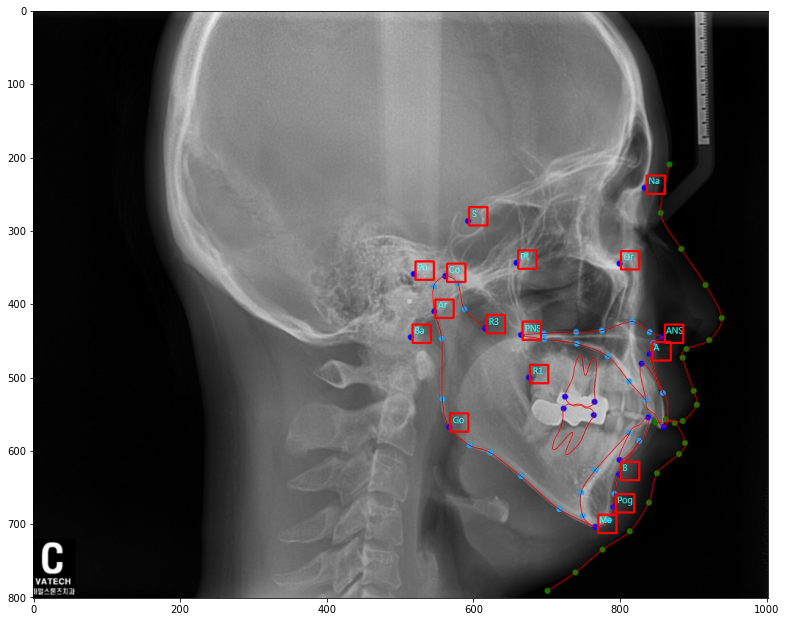

In [49]:
class Project:
    
    #def __init__(self, result):
     #   self.result = 0
    
    def LoadFile(self, sample_path):
        dir_path = glob.glob(sample_path+'/*')
        self.landmark_path = []

        for i, path in enumerate(dir_path):
            ffile = glob.glob(path+"/*")
            #print(ffile)

            for j, file in enumerate(ffile):
                #fname = os.path.basename(file)
                #print(fname)

                string = 'landmark'
                if  string in file:
                    self.landmark_path.append(file)

        return self.landmark_path
    
    
    def FindRedDot(self, landmark_path, lower1, lower2, upper1, upper2, sav_dir):
        self.red_contour = []
        self.red_final = []
        for idx, f in enumerate(landmark_path):
            # 이미지 로드
            fname = os.path.basename(f)
            
            img = cv2.imread(f)
            # BGR -> GRAY
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # BGR -> HSV
            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            # 특정 범위의 색깔 마스킹 
            # 위의 사진으로 설명하기
            # 빨간색의 HSv값이 0근처와 180근처에 있음.
            msk_1 = cv2.inRange(hsv, lower1, upper1)
            msk_2 = cv2.inRange(hsv, lower2, upper2)
            _, msk_1 = cv2.threshold(msk_1, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            _, msk_2 = cv2.threshold(msk_2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

            img_msk = cv2.bitwise_or(msk_1, msk_2)
            img_res = cv2.bitwise_and(hsv, hsv, mask=img_msk)
            if not os.path.isdir(sav_dir):
                os.mkdir(sav_dir)
            cv2.imwrite(sav_dir+'mask_'+fname+'.jpg', img_res)

            # 현재 찾은 점들은 빨간 점을 통과하는 파란점 때문에 빈 공간이 존재한다
            # dilate로 채워줌.

            k = cv2.getStructuringElement(cv2.MORPH_DILATE, (3, 3))
            img_dil = img_res.copy()
            img_dil = cv2.dilate(img_dil, k)
            #cv2.imwrite(sav_dir+'dil_'+fname+'.jpg', img_dil)
            _, contour, hierachy = cv2.findContours(cv2.cvtColor(img_dil, cv2.COLOR_RGB2GRAY), 
                                                   cv2.RETR_EXTERNAL,
                                                   cv2.CHAIN_APPROX_NONE)
            # 찾은 contour 개수
            n_contour = len(contour)
            
            self.red_contour.append(contour)

            print("{}의 red dot 개수: {}".format(fname, n_contour))

            img_fin = img_dil.copy()
            img_fin = cv2.drawContours(img_fin, contour, -1, (0, 0, 255), 4)            

            if not os.path.isdir(sav_dir):
                os.mkdir(sav_dir)
            sav_name = os.path.join(sav_dir ,'reddot_'+fname)
            cv2.imwrite(sav_name+'.jpg', img_fin)
            
            self.red_final.append(img_fin)
            
        return self.red_contour, self.red_final
    
    def FindWord(self, landmark_path, lower1, upper1, sav_dir):
        self.word = []
        self.word_contour = []
        for idx, file in enumerate(landmark_path):

            fname = os.path.basename(file)
            sample_landmark = cv2.imread(file)
            


            hsv = cv2.cvtColor(sample_landmark, cv2.COLOR_BGR2HSV)
            img_mask = cv2.inRange(hsv, lower1, upper1)
            img_result = cv2.bitwise_and(hsv, hsv, mask = img_mask)
            if idx==0:
                cv2.imwrite('./Project/'+'wordbin.jpg', img_result)

            img_bgr = cv2.cvtColor(img_result, cv2.COLOR_HSV2BGR)
            img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
            _, img_result = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)



            k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,1))
            opening = cv2.morphologyEx(img_result,cv2.MORPH_OPEN,k)

            k = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
            closing = cv2.morphologyEx(opening,cv2.MORPH_CLOSE,k)

            #plt.figure(figsize=(19.20, 10.80))
            #plt.imshow(closing, cmap='gray')

            _, contour1, hierarchy = cv2.findContours(closing,
                                                   cv2.RETR_EXTERNAL,
                                                   cv2.CHAIN_APPROX_NONE)
            
            if idx==0:
                #cv2.imwrite('./Project/'+'wordbin.jpg', img_result)
                cv2.imwrite('./Project/'+'wordclosing1.jpg', closing)
            #plt.imshow(im2,cmap='gray')
            #print('case I  {}의 도형의 갯수: {}'.format(fname, len(contour1)))


            for i in contour1:
                for j in i:
                    cv2.circle(closing, tuple(j[0]), 4, (255,0,0), -1)
                    
            if idx==0:
                #cv2.imwrite('./Project/'+'wordbin.jpg', img_result)
                cv2.imwrite('./Project/'+'wordcircle.jpg', closing)

            _, contour2, hierarchy = cv2.findContours(closing,
                                                   cv2.RETR_EXTERNAL,
                                                   cv2.CHAIN_APPROX_NONE)
            
            self.word_contour.append(contour2)
            
            
            print('case I  {}의 도형의 갯수: {}'.format(fname, len(contour2)))
            img_fin = sample_landmark.copy()

            for contour in contour2:
                x,y,w,h = cv2.boundingRect(contour)
                cv2.rectangle(img_fin,(x,y),(x+w,y+h),(255,0,0),3) #thickness =3
            
            if not os.path.isdir(sav_dir):
                os.mkdir(sav_dir)
            sav_name = os.path.join(sav_dir, 'word_'+fname)
            cv2.imwrite(sav_name, img_fin)
            self.word.append(img_fin)
            
        return self.word, self.word_contour

    def MakingTemp(self, temp_org_path, contour, sav_dir):
        temp_org = cv2.imread(temp_org_path)
        
        for i, c in enumerate(contour):
            name = str(i) + '_templet.jpg'
            x, y, w, h = cv2.boundingRect(c)
            cropped = temp_org[y:y+h, x:x+w]
            #print(x, y, w, h)
            #plt.imshow(cropped)
            if not os.path.isdir(sav_dir):
                os.mkdir(sav_dir)
            cv2.imwrite(sav_dir+'/'+name, cropped)
            
            
    def MatchingTemp(self, landmark_path, temp_path, contour, sav_path, csv_path):
       
        tem_list = [i for i in os.listdir(temp_path)]
        tem_images = [cv2.imread(temp_path+'/'+i) for i in tem_list]

        dict_templete = {}

        for i, temp in enumerate(tem_images):
            try:
                num = int(tem_list[i][:2])
                dict_templete[num] = temp
            except:
                num = int(tem_list[i][:1])
                dict_templete[num] = temp
                
        for idx, file in enumerate(landmark_path):
            sample_landmark = cv2.imread(file)
            fname = os.path.basename(file)
            tem_zeros = np.zeros(sample_landmark.shape)
            for c in contour[idx]:
                x,y,w,h = cv2.boundingRect(c)
                cv2.rectangle(tem_zeros,(x-3,y-3),(x+w+3,y+h+3),(255,255,255),-1)
                

            back = sample_landmark.copy()
            back[tem_zeros==0] = 0
            show = sample_landmark.copy()
            x_words = []
            y_words = []

            ############# 수정 필요 #############
            for i in range(len(contour[idx])):
                x,y,w,h = cv2.boundingRect(contour[idx][i])
                w, h = 25, 25
                res = cv2.matchTemplate(back, dict_templete[i], cv2.TM_CCOEFF_NORMED)
                min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

                bottom_right = (max_loc[0] + w, max_loc[1] + h)
                x_words.append(int(max_loc[0] + w/2))
                y_words.append(int(max_loc[1] + h/2))
                s = "{}, {}, {}, {}, {}".format(i, int(max_loc[0] + w/2), int(max_loc[1] + h/2), w, h)
                a = max_loc[0] - 3
                b = max_loc[1] - 3
                c = max_loc[0] + 3 + w
                d = max_loc[1] + 3 + h
                cv2.rectangle(back, (a,b), (c,d), (0,0,0), -1)
                cv2.rectangle(show, max_loc, bottom_right, (255,0,0), 2)
                
                if not os.path.isdir(sav_path):
                    os.mkdir(sav_path)
                    
                cv2.imwrite(sav_path+'/matchingtemp_'+fname+'.jpg', show)
                
            x = []
            y = []
            x_mean = 0
            y_mean = 0
            for con in contour:
                x_mean = 0
                y_mean = 0 
                for c in con:
                    x_mean += c[idx][0][0]
                    y_mean += c[idx][0][1]
                x.append(int(x_mean / len(con)))
                y.append(int(y_mean / len(con)))
            #print(len(x))
            x = np.array(x)
            y = np.array(y)        
            background = sample_landmark.copy()
            #print(x_words)
            #print(y_words)
            i=0
            if not os.path.isdir(csv_path):
                os.mkdir(csv_path)
            csv_name = os.path.join(csv_path, fname)
            
            
            # 유클리드 거리
            for x_word, y_word in zip(x_words, y_words):
                x_diff = x - x_word
                y_diff = y - y_word
                x_diff = np.where(x_diff<0,x_diff+5,x_diff)
                y_diff = np.where(y_diff>0,y_diff-5,y_diff)
                x_diff = x_diff * x_diff
                y_diff = y_diff * y_diff
                distance = np.sqrt(x_diff + y_diff)
                min_arg = np.argmin(distance)
                coord = "{},{},{}".format(i, x[min_arg], y[min_arg])
                cv2.line(background, (x_word, y_word), (x[min_arg], y[min_arg]),(255,255,255),3)
                print(coord)
                cv2.imwrite('./Project/test.jpg', background)
                with open(csv_name, "a") as f:
                    f.write(coord + "\n") 
                i += 1
            
        plt.figure(figsize=(19.20, 10.80))
        plt.imshow(show)
        
    plt.show()
            
        

            
proj = Project() 
landmark_path = proj.LoadFile(sample_path='./sample')
red_contour, red_fin = proj.FindRedDot(landmark_path=landmark_path, lower1=(169, 190, 190),
lower2 = (0, 190, 190),
upper1 = (179, 255, 255),
upper2 = (10, 255, 255), sav_dir = './Project/Reddot')

word, word_contour = proj.FindWord(landmark_path=landmark_path, lower1 = (25, 100, 100)
, upper1 = (35, 255, 255), sav_dir='./Project/Word')
temp = proj.MakingTemp(temp_org_path=landmark_path[0], contour=word_contour[0], sav_dir="./Project/Temp")
match_temp = proj.MatchingTemp(landmark_path=landmark_path, temp_path='./Project/Temp', 
                               contour=word_contour, sav_path='./Project/MatchTemp', csv_path='./Project/csv')

In [ ]:
dot_path = './'

* 프로젝트에서 필요한 'S000N_landmark.jpg'만 모아 하나의 디렉토리로 생성 

In [3]:
def LoadFile(sample_path):
    dir_path = glob.glob(sample_path+'/*')
    landmark_path = []

    for i, path in enumerate(dir_path):
        ffile = glob.glob(path+"/*")
        #print(ffile)

        for j, file in enumerate(ffile):
            #fname = os.path.basename(file)
            #print(fname)

            string = 'landmark'
            if  string in file:
                landmark_path.append(file)
                
    return landmark_path

In [5]:
landmark_path = LoadFile(sample_path='./sample')

In [4]:
def LoadTemplete(temp_path):
    dir_path = glob.glob(temp_path + '/*')
    temp_img = []
    
    for i, path in enumerate(dir_path):
        
        temp_img.append(path) 
        
    return temp_img

## 3. Progress
## (1) Extracting Red Dot 
#### a. 특정 색깔 (빨강)을 추출하기 위해 'HSV color space' 사용
* HSV를 사용한 이유
    > * RGB : 빨강(R), 초록(G), 파랑(B)의 조합으로 표현
    > * HSV : 색들의 조합이 아닌 그 색깔 자체를 Hue 채널을 통해 표현
    > * 노랑을 표현할 때 RGB는 빨강과 초록에 조합으로, HSV는 노랑색 그 자체로 알려줌.
> * **따라서 HSV가 RGB에 비해 색깔 표현에 있어 직관적이다.** 

![hsv_range](https://user-images.githubusercontent.com/53852102/100130878-a9141500-2ec6-11eb-9043-8c4a25356ebd.png)


In [6]:
# 빨간색의 HSV 범위

lower_red_1 = (169, 190, 190)
lower_red_2 = (0, 190, 190)
upper_red_1 = (179, 255, 255)
upper_red_2 = (10, 255, 255)

#### b. `dilate` : 찾은 빨간 점의 빈공간 채워줌.
> `k = cv2.getStructuringElement(cv2.MORPH_DILATE, (3, 3))
img_dil = img_res.copy()
img_dil = cv2.dilate(img_dil, k)`

> 아래 이미지와 같이 HSV값을 이용해 추출한 빨간점들은 빨간점을 지나는 파란선이 제거되어 중간에 빈 공간이 생긴다.   
> 이를 dilate를 이용해 메꿔준다.
>![nn](img/after_dilation.png)




#### c. contour : 빨간점의 테두리를 찾아 빨간점의 테두리를 그린다.  (총 25개)
>`contour, hierachy = cv2.findContours(cv2.cvtColor(img_dil, cv2.COLOR_RGB2GRAY),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)`                                                           
>`img_fin = img_dil.copy()`  
>`img_fin = cv2.drawContours(img_fin, contour, -1, (0, 0, 255), 4)`
> ![nn](img/reddotS0001_landmark.jpg.jpg)                                             

--------------------------------------------------------
## (2) Extracting Yellow Word 
#### a. labeling된 글자도 빨간점과 마찬가지로 HSV color space를 이용해 **노란색** 컬러 정보를 가진 부분만 흰색인 binary image를 생성
> `img_mask = cv2.inRange(hsv, lower1, upper1)
 img_result = cv2.bitwise_and(hsv, hsv, mask = img_mask)`
> ![nn](img/wordyellow.jpg)

#### b. 글자 간에 연결성이 부족하므로 `opening`을 통해 연결 강화  &  글자 이외의 노란 성분을 가진 것(=Noise)를 제거하기 위해 `closing`사용 --> 
> ` k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,1))
opening = cv2.morphologyEx(img_result,cv2.MORPH_OPEN,k)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
closing = cv2.morphologyEx(opening,cv2.MORPH_CLOSE,k)`
> ![nn](img/wordcontour1.jpg)

#### c. 
* 글자를 다 포함할 만큼의 contour가 완성되지 않았다고 판단    
* b 이후 진행한 `findContours()`에서 찾은 contour좌표에 `cv2.circle()`을 이용해 메꾼다.
> `for i in contour1:
       for j in i:  
          cv2.circle(closing, tuple(j[0]), 4, (255,0,0), -1)`
          
* 다시 `findContours()`로 테두리 좌표 값을 반환
> `_, contour2, hierarchy = cv2.findContours(closing,
cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)`

* 그 좌표에 `cv2.retangle()`을 이용해 **labeling 글자만을** 박스친다.
> `for contour in contour2:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(img_fin,(x,y),(x+w,y+h),(255,0,0),3)`  
    
![nn](img/word_detect.png)

## (3) Making the Template image of Word Label
* a. 0번 image로 레이블 글자 템플릿 생성

In [ ]:
temp_org = cv2.imread(temp_org_path)

for i, c in enumerate(contour):
    name = str(i) + '_templet.jpg'
    x, y, w, h = cv2.boundingRect(c)
    cropped = temp_org[y:y+h, x:x+w]
    #print(x, y, w, h)
    #plt.imshow(cropped)
    if not os.path.isdir(sav_dir):
        os.mkdir(sav_dir)
    cv2.imwrite(sav_dir+'/'+name, cropped)

* 템플릿 목록
> 0. Me  
> 1. Pog  
> 2. B  
> 3. Go  
> 4. R1  
> 5. A  
> 6. ANS  
> 7. PNS  
> 8. Ba  
> 9. R3  
> 10. Ar  
> 11. Or  
> 12. Po  
> 13. Co  
> 14. Pt  
> 15. S  
> 16. Na  

* b. templete과 이미지를 `matchTemplate`을 이용해 비교해서 templete에 있는 글자와 같은 글자 찾기

> `res = cv2.matchTemplate(back, dict_templete[i], cv2.TM_CCOEFF_NORMED)
                min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)`

![nn](img/matchingTemp.jpg)

* c. Detection된 빨간점과 노란색 글자들의 좌표값을 이용하여 해당점과 서로 연결한 뒤, 이를 바탕으로 각각의 점들을 레이블링하여 
csv파일로 저장한다.



![nn](img/line.png)